In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

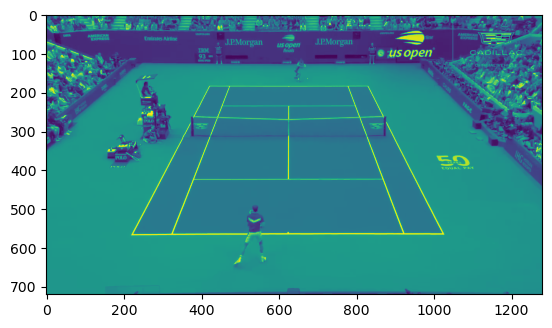

In [50]:
image_path = 'input_images\\us_open_2023.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

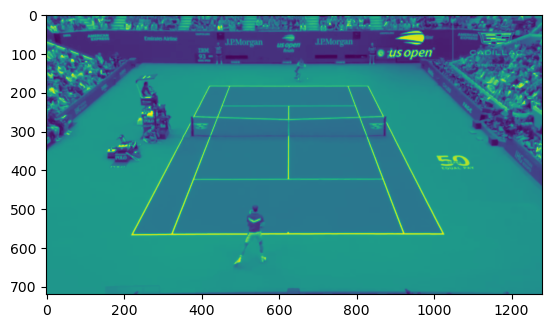

In [51]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred)

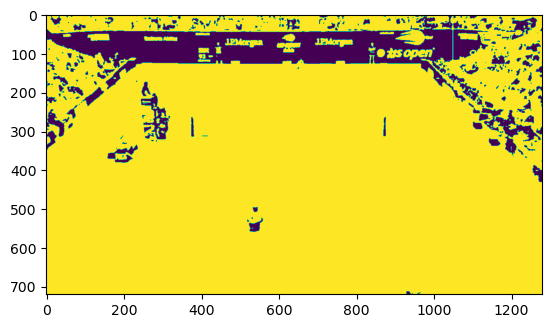

In [49]:
_, thresholded = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded)

In [45]:
thresholded[thresholded == 255] = 1

In [ ]:
# Apply Zhang-Suen thinning
thinned = zhang_suen_thinning(thresholded)

# Convert back to 8-bit image
thinned = thinned.astype(np.uint8) * 255
plt.imshow(thinned)


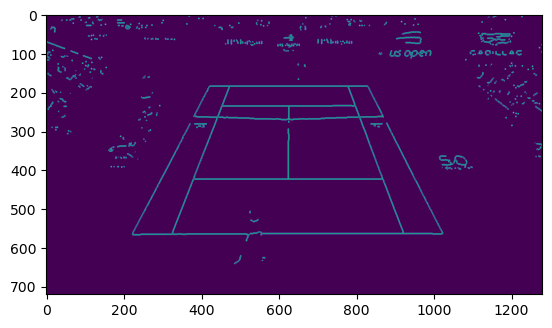

In [37]:
edges = cv2.Canny(thinned, 50, 150)
plt.imshow(edges)

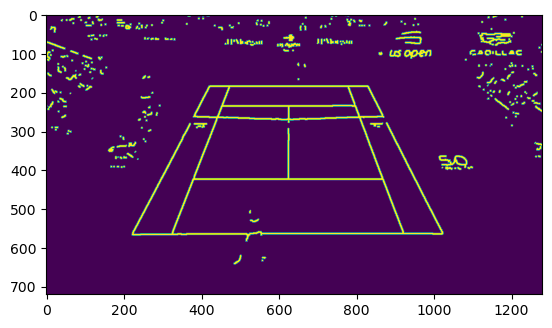

In [38]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated = cv2.dilate(edges, kernel)
plt.imshow(dilated)

In [39]:
image_path_no_extension = image_path[:-4]

In [40]:
new_image_path = image_path_no_extension + '_processed'

In [41]:
cv2.imwrite(new_image_path + '.png', dilated)

True

In [8]:
def zhang_suen_thinning(image):
    """Applies Zhang-Suen thinning algorithm to a binary image."""
    # Make a copy of the image to work on
    thinned_image = image.copy()
    changing1 = changing2 = 1
    rows, columns = image.shape

    while changing1 or changing2:
        # Step 1
        changing1 = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):
                # Check if the pixel needs to be removed
                if thinned_image[x][y] == 1:
                    neighbors = [
                        thinned_image[x-1][y], thinned_image[x-1][y+1], thinned_image[x][y+1], thinned_image[x+1][y+1],
                        thinned_image[x+1][y], thinned_image[x+1][y-1], thinned_image[x][y-1], thinned_image[x-1][y-1]
                    ]
                    C = sum(neighbors)
                    if C >= 2 and C <= 6:
                        A = sum((neighbors[i] == 0 and neighbors[(i + 1) % 8] == 1) for i in range(8))
                        if A == 1:
                            if (neighbors[0] * neighbors[2] * neighbors[4] == 0) and (neighbors[2] * neighbors[4] * neighbors[6] == 0):
                                changing1.append((x, y))
        for x, y in changing1:
            thinned_image[x][y] = 0

        # Step 2
        changing2 = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):
                # Check if the pixel needs to be removed
                if thinned_image[x][y] == 1:
                    neighbors = [
                        thinned_image[x-1][y], thinned_image[x-1][y+1], thinned_image[x][y+1], thinned_image[x+1][y+1],
                        thinned_image[x+1][y], thinned_image[x+1][y-1], thinned_image[x][y-1], thinned_image[x-1][y-1]
                    ]
                    C = sum(neighbors)
                    if C >= 2 and C <= 6:
                        A = sum((neighbors[i] == 0 and neighbors[(i + 1) % 8] == 1) for i in range(8))
                        if A == 1:
                            if (neighbors[0] * neighbors[2] * neighbors[6] == 0) and (neighbors[0] * neighbors[4] * neighbors[6] == 0):
                                changing2.append((x, y))
        for x, y in changing2:
            thinned_image[x][y] = 0

    return thinned_image